In [ ]:
dir_root = '.'
# If using google colab
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive/')
    dir_root = '/content/drive/MyDrive/Colab Notebooks/ESE546/hw3'

print(dir_root)

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/ESE546/hw3


In [ ]:
import requests

# Load the text from a local file
def load_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# Load the text from a URL
def load_text_from_url(url):
    response = requests.get(url)
    text = response.text.replace('\r\n', '\n')  # Normalize line endings
    return text

# Count unique characters in the text
def count_unique_chars(text):
    unique_chars = set(text)
    # Num of unique characters
    vocab_size = len(unique_chars)
    return vocab_size, unique_chars

# List of file paths or URLs
local_file_1 = 'pg100.txt'
local_file_2 = 'pg2600.txt'
local_file_3 = 'pg766.txt'
url_file_1 = 'https://www.gutenberg.org/cache/epub/100/pg100.txt'
url_file_2 = 'https://www.gutenberg.org/cache/epub/2600/pg2600.txt'
url_file_3 = 'https://www.gutenberg.org/cache/epub/766/pg766.txt'

if 'google.colab' in str(get_ipython()):
    file_path_list = [url_file_1, url_file_2, url_file_3]
else:
    file_path_list = [local_file_1, local_file_2, local_file_3]
text_list = []
vocab_size_list = []
unique_chars_list = []

for file_path in file_path_list:
    if file_path.startswith('http'):
        print(f'Loading text from URL: {file_path}')
        text = load_text_from_url(file_path)
    else:
        print(f'Loading text from file: {file_path}')
        text = load_text_from_file(file_path)
    vocab_size, unique_chars = count_unique_chars(text)
    text_list.append(text)
    vocab_size_list.append(vocab_size)
    unique_chars_list.append(unique_chars)

print(f'Vocabulary size for each text: {vocab_size_list}')
print(f'Unique characters for each text: {unique_chars_list}')

Loading text from URL: https://www.gutenberg.org/cache/epub/100/pg100.txt
Loading text from URL: https://www.gutenberg.org/cache/epub/2600/pg2600.txt
Loading text from URL: https://www.gutenberg.org/cache/epub/766/pg766.txt
Vocabulary size for each text: [107, 112, 90]
Unique characters for each text: [{'…', 's', 'Æ', '*', ' ', '1', '(', 'I', 'p', '&', 'y', 'À', 'à', 'U', 'L', '•', '\ufeff', '/', '™', '4', '.', '6', 'W', '8', 'D', 'Q', '%', '3', ';', 'c', 'Y', 'r', '’', 'l', '!', '0', 't', 'v', 'j', 'æ', 'u', 'n', 'k', '2', '\n', 'A', 'e', 'd', 'B', 'x', '‘', 'N', "'", 'b', 'V', 'ç', 'F', '5', 'P', '?', ':', 'œ', 'm', ']', 'ê', '#', ')', '”', '_', '7', 'X', 'a', 'K', 'É', 'C', '—', 'i', 'T', 'Z', 'é', ',', 'J', '-', 'M', '9', 'Ç', 'O', 'z', 'î', 'w', 'f', 'â', 'G', 'o', 'H', 'S', '“', 'h', 'è', 'R', '$', 'ë', 'E', '\t', '[', 'g', 'q'}, {'s', '=', '*', ' ', '1', '(', 'I', 'p', 'y', 'À', 'à', 'U', 'L', '•', '\ufeff', '/', '™', '4', '.', '6', 'W', '8', 'D', 'Q', '%', '3', 'c', 'Y', ';', '

In [ ]:
# Create a dictionary to map characters to indices and vice-versa
def create_char_mappings(unique_chars):
    char_to_index = {char: idx for idx, char in enumerate(unique_chars)}
    index_to_char = {idx: char for idx, char in enumerate(unique_chars)}
    return char_to_index, index_to_char

vocab_size, unique_chars = vocab_size_list[0], unique_chars_list[0]
char_to_index, index_to_char = create_char_mappings(unique_chars)
print(f"Character to index mapping for first text: {char_to_index}")
print(f"Index to character mapping for first text: {index_to_char}")

Character to index mapping for first text: {'…': 0, 's': 1, 'Æ': 2, '*': 3, ' ': 4, '1': 5, '(': 6, 'I': 7, 'p': 8, '&': 9, 'y': 10, 'À': 11, 'à': 12, 'U': 13, 'L': 14, '•': 15, '\ufeff': 16, '/': 17, '™': 18, '4': 19, '.': 20, '6': 21, 'W': 22, '8': 23, 'D': 24, 'Q': 25, '%': 26, '3': 27, ';': 28, 'c': 29, 'Y': 30, 'r': 31, '’': 32, 'l': 33, '!': 34, '0': 35, 't': 36, 'v': 37, 'j': 38, 'æ': 39, 'u': 40, 'n': 41, 'k': 42, '2': 43, '\n': 44, 'A': 45, 'e': 46, 'd': 47, 'B': 48, 'x': 49, '‘': 50, 'N': 51, "'": 52, 'b': 53, 'V': 54, 'ç': 55, 'F': 56, '5': 57, 'P': 58, '?': 59, ':': 60, 'œ': 61, 'm': 62, ']': 63, 'ê': 64, '#': 65, ')': 66, '”': 67, '_': 68, '7': 69, 'X': 70, 'a': 71, 'K': 72, 'É': 73, 'C': 74, '—': 75, 'i': 76, 'T': 77, 'Z': 78, 'é': 79, ',': 80, 'J': 81, '-': 82, 'M': 83, '9': 84, 'Ç': 85, 'O': 86, 'z': 87, 'î': 88, 'w': 89, 'f': 90, 'â': 91, 'G': 92, 'o': 93, 'H': 94, 'S': 95, '“': 96, 'h': 97, 'è': 98, 'R': 99, '$': 100, 'ë': 101, 'E': 102, '\t': 103, '[': 104, 'g': 105,

In [ ]:
from tqdm import tqdm
import numpy as np

def generate_sequences_for_transformer(text, char_to_index, seq_length=128, stride=16, target_offset=1):
    """
    Generate sequences of indices for transformer training.
    Returns input and target sequences as integer indices instead of one-hot vectors.
    """
    input_sequences = []
    target_sequences = []

    for i in tqdm(range(0, len(text) - seq_length - target_offset, stride),
                 desc="Generating sequences"):
        # Input sequence
        input_seq = text[i:i + seq_length]
        # Target sequence (shifted by 1 position)
        target_seq = text[i + target_offset:i + target_offset + seq_length]

        # Convert characters to indices
        input_indices = [char_to_index[c] for c in input_seq]
        target_indices = [char_to_index[c] for c in target_seq]

        input_sequences.append(input_indices)
        target_sequences.append(target_indices)

    return np.array(input_sequences), np.array(target_sequences)

def generate_sequences_for_transformer_(text, char_to_index, seq_length=128, stride=16, target_offset=1):
    """
    Generate sequences where:
    - input_sequences are characters 1-128
    - target_sequences are characters 129-256
    """
    input_sequences = []
    target_sequences = []

    for i in tqdm(range(0, len(text) - seq_length*2, stride)):
        # Input sequence: first 128 characters
        input_seq = text[i:i + seq_length]
        # Target sequence: next 128 characters
        target_seq = text[i + seq_length:i + seq_length*2]

        input_indices = [char_to_index[c] for c in input_seq]
        target_indices = [char_to_index[c] for c in target_seq]

        input_sequences.append(input_indices)
        target_sequences.append(target_indices)

    return np.array(input_sequences), np.array(target_sequences)

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset, TensorDataset, random_split

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(f"Device: {device}")

Device: cuda


In [ ]:
# Data preparation
USE_ALL_BOOKS = False
if 'google.colab' in str(get_ipython()):
    USE_ALL_BOOKS = True

sequence_length = 128
stride = 96
target_offset = 1

if USE_ALL_BOOKS:
    # Load text and prepare data
    all_texts = ''.join(text_list)
    # all_texts = all_texts[:len(all_texts)//10]
    # all_texts += all_texts[len(all_texts)//2:len(all_texts)//2 + len(all_texts)//10]
    # all_texts += all_texts[len(all_texts)//2 + len(all_texts)//10:]
    vocab_size, unique_chars = count_unique_chars(all_texts)
    char_to_index, index_to_char = create_char_mappings(unique_chars)
    print(f"Vocabulary size: {vocab_size}")
    input_seqs, target_seqs = generate_sequences_for_transformer(
        all_texts, char_to_index, seq_length=sequence_length, stride=stride, target_offset=target_offset
    )
else:
    text = text_list[0]
    text = text[:len(text)//1]
    vocab_size, unique_chars = count_unique_chars(text)
    char_to_index, index_to_char = create_char_mappings(unique_chars)
    print(f"Vocabulary size: {vocab_size}")
    input_seqs, target_seqs = generate_sequences_for_transformer(
        text, char_to_index, seq_length=sequence_length, stride=stride, target_offset=target_offset
    )

# Convert to PyTorch tensors
input_seqs = torch.tensor(input_seqs, dtype=torch.long).to(device)
target_seqs = torch.tensor(target_seqs, dtype=torch.long).to(device)

# Create datasets
dataset = TensorDataset(input_seqs, target_seqs)
train_size = int(0.8 * len(dataset))
train_dataset = TensorDataset(input_seqs[:train_size], target_seqs[:train_size])
val_dataset = TensorDataset(input_seqs[train_size:], target_seqs[train_size:])

print("Input sequences shape:", input_seqs.shape)
print("Target sequences shape:", target_seqs.shape)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

Vocabulary size: 119


Generating sequences: 100%|██████████| 110002/110002 [00:02<00:00, 47181.43it/s]


Input sequences shape: torch.Size([110002, 128])
Target sequences shape: torch.Size([110002, 128])


In [ ]:
temp_test_input_seq_0 = input_seqs[0].cpu().numpy()
temp_test_target_seq_0 = target_seqs[0].cpu().numpy()
print(">Example input sequence:\n", ''.join([index_to_char[idx] for idx in temp_test_input_seq_0]))
print(">Example target sequence:\n", ''.join([index_to_char[idx] for idx in temp_test_target_seq_0]))
temp_test_input_seq_1 = input_seqs[1].cpu().numpy()
temp_test_target_seq_1 = target_seqs[1].cpu().numpy()
print(">Example input sequence:\n", ''.join([index_to_char[idx] for idx in temp_test_input_seq_1]))
print(">Example target sequence:\n", ''.join([index_to_char[idx] for idx in temp_test_target_seq_1]))

>Example input sequence:
 ﻿The Project Gutenberg eBook of The Complete Works of William Shakespeare
    
This ebook is for the use of anyone anywhere in t
>Example target sequence:
 The Project Gutenberg eBook of The Complete Works of William Shakespeare
    
This ebook is for the use of anyone anywhere in th
>Example input sequence:
  the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
wh
>Example target sequence:
 the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
wha


In [ ]:
import torch.nn as nn
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=128, dropout=0.1):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, d_model)
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(1)]
        return self.dropout(x)

class TransformerModel(nn.Module):
    def __init__(self, vocab_size, d_model=256, nhead=8, num_layers=4,
                 dim_feedforward=1024, dropout=0.2):
        super().__init__()
        self.d_model = d_model

        self.embedding = nn.Embedding(vocab_size, d_model)
        self.pos_encoder = PositionalEncoding(d_model, dropout=dropout)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=dim_feedforward,
            dropout=dropout,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers)
        self.decoder = nn.Linear(d_model, vocab_size)

        self.init_weights()

    def init_weights(self):
        initrange = 0.1
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, src):
        mask = self._generate_square_subsequent_mask(src.size(1)).to(src.device)
        src_mask = mask

        src = self.embedding(src) * math.sqrt(self.d_model)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, src_mask)
        output = self.decoder(output)
        return output

    def _generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

class WarmupLR:
    def __init__(self, optimizer, d_model, warmup_steps=4000):
        self.optimizer = optimizer
        self.d_model = d_model
        self.warmup_steps = warmup_steps
        self.step_num = 0

    def step(self):
        self.step_num += 1
        lr = self.d_model ** (-0.5) * min(self.step_num ** (-0.5),
                                        self.step_num * self.warmup_steps ** (-1.5))
        for param_group in self.optimizer.param_groups:
            param_group['lr'] = lr

In [ ]:
# Training setup
model = TransformerModel(
    vocab_size,
    d_model=512,
    nhead=16,
    num_layers=6,
    dim_feedforward=2048,
    dropout=0.2
).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0, betas=(0.9, 0.98), eps=1e-9)
scheduler = WarmupLR(optimizer, d_model=512)

# Training and validation tracking
training_losses = []
validation_losses = []
training_accuracies = []
validation_accuracies = []
update_counts = []
update_cnt = 0

# Training loop
num_epochs = 20
for epoch in tqdm(range(num_epochs)):
    model.train()
    total_loss = 0

    for batch_idx, (input_seq, target_seq) in enumerate(train_loader):
        input_seq, target_seq = input_seq.to(device), target_seq.to(device)
        seq_len = input_seq.size(1)
        # src_mask = generate_square_subsequent_mask(seq_len).to(device)

        optimizer.zero_grad()
        output = model(input_seq)
        loss = criterion(output.view(-1, vocab_size), target_seq.view(-1))

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()

        # Record metrics every 100 updates
        if update_cnt % 100 == 0:
            training_losses.append(loss.item())
            update_counts.append(update_cnt)

            with torch.no_grad():
                pred = output.argmax(dim=-1)
                accuracy = (pred == target_seq).float().mean().item()
                training_accuracies.append(accuracy)

        # Validation every 1000 updates
        if update_cnt % 1000 == 0:
            model.eval()
            val_loss = 0
            val_accuracy = 0
            num_batches = 0

            with torch.no_grad():
                for val_input, val_target in val_loader:
                    val_input, val_target = val_input.to(device), val_target.to(device)
                    # val_mask = generate_square_subsequent_mask(seq_len).to(device)

                    # Predict next 128 characters
                    pred_output = model(val_input)

                    # Calculate loss on the future sequence
                    val_loss += criterion(pred_output.view(-1, vocab_size), val_target.view(-1)).item()

                    # For accuracy
                    val_pred = pred_output.argmax(dim=-1)
                    val_accuracy += (val_pred == val_target).float().mean().item()
                    num_batches += 1

            avg_val_loss = val_loss / num_batches
            avg_val_accuracy = val_accuracy / num_batches
            validation_losses.append(avg_val_loss)
            validation_accuracies.append(avg_val_accuracy)

            print(f'Update {update_cnt}, Train Loss: {loss.item():.4f}, '
                  f'Train Acc: {accuracy:.4f}, Val Loss: {avg_val_loss:.4f}, '
                  f'Val Acc: {avg_val_accuracy:.4f}, '
                  f'LR: {optimizer.param_groups[0]["lr"]:.4f}')

            model.train()

        update_cnt += 1

    print(f'Epoch {epoch+1}, Average loss: {total_loss/len(train_loader):.4f}')

  0%|          | 0/20 [00:00<?, ?it/s]

Update 0, Train Loss: 5.7085, Train Acc: 0.0052, Val Loss: 5.7326, Val Acc: 0.0065, LR: 0.0000
Update 1000, Train Loss: 2.0269, Train Acc: 0.4014, Val Loss: 2.0298, Val Acc: 0.4067, LR: 0.0002


  5%|▌         | 1/20 [04:28<1:24:58, 268.33s/it]

Epoch 1, Average loss: 2.3699
Update 2000, Train Loss: 1.6568, Train Acc: 0.4927, Val Loss: 1.7426, Val Acc: 0.4913, LR: 0.0003


 10%|█         | 2/20 [08:32<1:16:17, 254.30s/it]

Epoch 2, Average loss: 1.6795
Update 3000, Train Loss: 1.5833, Train Acc: 0.5171, Val Loss: 1.6349, Val Acc: 0.5167, LR: 0.0005
Update 4000, Train Loss: 1.4895, Train Acc: 0.5424, Val Loss: 1.5918, Val Acc: 0.5304, LR: 0.0007


 15%|█▌        | 3/20 [12:55<1:13:11, 258.35s/it]

Epoch 3, Average loss: 1.5130
Update 5000, Train Loss: 1.4133, Train Acc: 0.5692, Val Loss: 1.5559, Val Acc: 0.5409, LR: 0.0006


 20%|██        | 4/20 [16:57<1:07:05, 251.61s/it]

Epoch 4, Average loss: 1.4305
Update 6000, Train Loss: 1.4079, Train Acc: 0.5607, Val Loss: 1.5210, Val Acc: 0.5504, LR: 0.0006


 25%|██▌       | 5/20 [20:58<1:01:57, 247.84s/it]

Epoch 5, Average loss: 1.3734
Update 7000, Train Loss: 1.3294, Train Acc: 0.5801, Val Loss: 1.5084, Val Acc: 0.5563, LR: 0.0005
Update 8000, Train Loss: 1.3957, Train Acc: 0.5687, Val Loss: 1.4884, Val Acc: 0.5613, LR: 0.0005


 30%|███       | 6/20 [25:19<58:53, 252.38s/it]  

Epoch 6, Average loss: 1.3367
Update 9000, Train Loss: 1.3131, Train Acc: 0.5894, Val Loss: 1.4753, Val Acc: 0.5650, LR: 0.0005


 35%|███▌      | 7/20 [29:20<53:52, 248.66s/it]

Epoch 7, Average loss: 1.3108
Update 10000, Train Loss: 1.3085, Train Acc: 0.5906, Val Loss: 1.4718, Val Acc: 0.5687, LR: 0.0004
Update 11000, Train Loss: 1.2853, Train Acc: 0.6014, Val Loss: 1.4602, Val Acc: 0.5715, LR: 0.0004


 40%|████      | 8/20 [33:41<50:31, 252.58s/it]

Epoch 8, Average loss: 1.2907
Update 12000, Train Loss: 1.2627, Train Acc: 0.6028, Val Loss: 1.4562, Val Acc: 0.5742, LR: 0.0004


 45%|████▌     | 9/20 [37:42<45:37, 248.89s/it]

Epoch 9, Average loss: 1.2742
Update 13000, Train Loss: 1.2312, Train Acc: 0.6108, Val Loss: 1.4439, Val Acc: 0.5768, LR: 0.0004


 50%|█████     | 10/20 [41:42<41:03, 246.34s/it]

Epoch 10, Average loss: 1.2603
Update 14000, Train Loss: 1.2221, Train Acc: 0.6145, Val Loss: 1.4427, Val Acc: 0.5796, LR: 0.0004
Update 15000, Train Loss: 1.2646, Train Acc: 0.6068, Val Loss: 1.4299, Val Acc: 0.5819, LR: 0.0004


 55%|█████▌    | 11/20 [46:04<37:37, 250.87s/it]

Epoch 11, Average loss: 1.2493
Update 16000, Train Loss: 1.2158, Train Acc: 0.6162, Val Loss: 1.4410, Val Acc: 0.5799, LR: 0.0003


 60%|██████    | 12/20 [50:04<33:01, 247.74s/it]

Epoch 12, Average loss: 1.2391
Update 17000, Train Loss: 1.2179, Train Acc: 0.6182, Val Loss: 1.4263, Val Acc: 0.5834, LR: 0.0003


 65%|██████▌   | 13/20 [54:05<28:39, 245.59s/it]

Epoch 13, Average loss: 1.2305
Update 18000, Train Loss: 1.2129, Train Acc: 0.6151, Val Loss: 1.4319, Val Acc: 0.5836, LR: 0.0003
Update 19000, Train Loss: 1.2081, Train Acc: 0.6118, Val Loss: 1.4287, Val Acc: 0.5847, LR: 0.0003


 70%|███████   | 14/20 [58:26<25:01, 250.24s/it]

Epoch 14, Average loss: 1.2221
Update 20000, Train Loss: 1.2429, Train Acc: 0.6151, Val Loss: 1.4327, Val Acc: 0.5855, LR: 0.0003


 75%|███████▌  | 15/20 [1:02:26<20:36, 247.33s/it]

Epoch 15, Average loss: 1.2150
Update 21000, Train Loss: 1.2221, Train Acc: 0.6147, Val Loss: 1.4251, Val Acc: 0.5860, LR: 0.0003
Update 22000, Train Loss: 1.1856, Train Acc: 0.6287, Val Loss: 1.4234, Val Acc: 0.5879, LR: 0.0003


 80%|████████  | 16/20 [1:06:47<16:45, 251.41s/it]

Epoch 16, Average loss: 1.2086
Update 23000, Train Loss: 1.1744, Train Acc: 0.6306, Val Loss: 1.4239, Val Acc: 0.5878, LR: 0.0003


 85%|████████▌ | 17/20 [1:10:48<12:24, 248.12s/it]

Epoch 17, Average loss: 1.2028
Update 24000, Train Loss: 1.2015, Train Acc: 0.6226, Val Loss: 1.4196, Val Acc: 0.5885, LR: 0.0003


 90%|█████████ | 18/20 [1:14:48<08:11, 245.86s/it]

Epoch 18, Average loss: 1.1973
Update 25000, Train Loss: 1.1860, Train Acc: 0.6256, Val Loss: 1.4167, Val Acc: 0.5886, LR: 0.0003
Update 26000, Train Loss: 1.1450, Train Acc: 0.6367, Val Loss: 1.4205, Val Acc: 0.5894, LR: 0.0003


 95%|█████████▌| 19/20 [1:19:09<04:10, 250.39s/it]

Epoch 19, Average loss: 1.1924
Update 27000, Train Loss: 1.2090, Train Acc: 0.6198, Val Loss: 1.4126, Val Acc: 0.5892, LR: 0.0003


100%|██████████| 20/20 [1:23:10<00:00, 249.51s/it]

Epoch 20, Average loss: 1.1877


In [ ]:
# temp_test_input = np.array([58,  9, 41, 55, 27, 93, 41,  9, 68,  6, 55,  6,  1, 72, 66, 66, 82, 41,
#         55, 73, 77, 30, 78, 72, 55, 62, 14, 72, 55, 77, 73,  9, 83,  6, 48, 55,
#         30, 31, 55, 43, 30, 31, 64, 74, 14, 72, 55, 10, 31, 72,  6,  6, 55, 30,
#         43, 55, 77, 30, 73, 62,  6, 55, 30, 31, 55, 10, 31, 79, 41, 72, 21, 55,
#         58, 55, 10, 79, 72, 75, 72, 55, 30, 43, 55,  1, 30, 31, 83, 64, 45, 30,
#         55, 77, 31, 73, 78, 72, 66, 93, 55, 41, 30,  9, 72, 48, 55,  6, 30, 55,
#         31, 79, 75, 14, 48, 55, 62, 14, 73, 62, 55, 79, 62, 55, 41, 79, 41, 55,
#          6, 62])
# temp_test_target = np.array([31, 79, 78, 72, 64, 19,  9, 55,  1, 30, 31, 83, 57, 73,  9,  6, 14, 79,
#         10, 55, 73,  9, 41, 55, 78, 73, 66, 68, 72, 80, 55,  1, 14, 79, 75, 14,
#         55, 19, 55,  1, 30,  9, 41, 72, 31, 82, 41, 64, 27, 30, 68, 66, 41, 55,
#         77, 72, 55,  6, 30, 55, 31, 73, 31, 72, 66, 93, 55, 73,  9, 41, 55, 72,
#         50, 73, 75, 62, 66, 93, 55,  1, 31, 30, 68, 51, 14, 62, 48, 64, 45, 79,
#          9, 75, 72, 55, 62, 14, 72, 55, 62, 31, 68, 72, 55, 66, 79, 43, 72, 55,
#         30,  9, 82, 62, 55,  1, 73,  6, 92, 64, 64, 39, 42, 45, 74, 52, 53, 90,
#         53, 45])
# temp_test_input_char = []
# temp_test_target_char = []
# for i in range(len(temp_test_input)):
#     temp_test_input_char.append(index_to_char[temp_test_input[i]])
# for i in range(len(temp_test_target)):
#     temp_test_target_char.append(index_to_char[temp_test_target[i]])
# print(">Input:")
# print(''.join(temp_test_input_char))
# print(">Target:")
# print(''.join(temp_test_target_char))

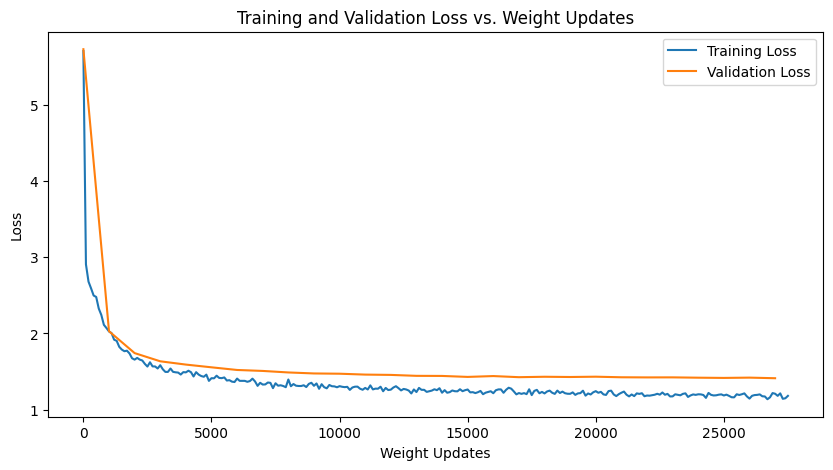

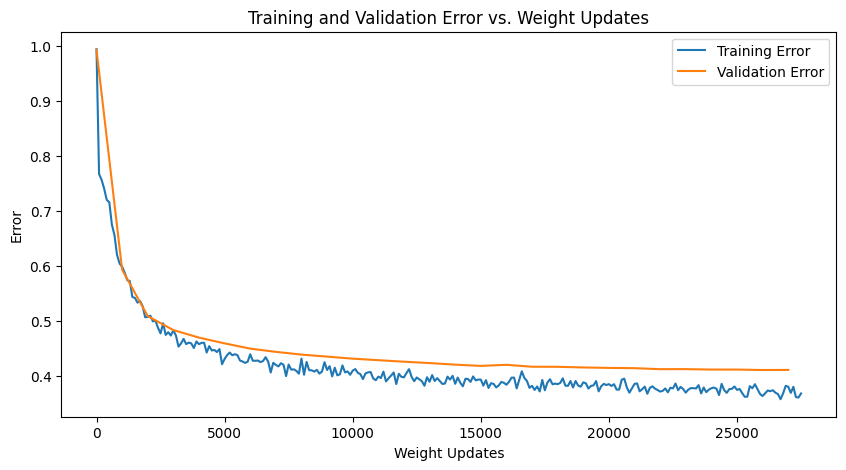

In [ ]:
import matplotlib.pyplot as plt

# Save the accuracies and errors and .npy file
np.save(f'{dir_root}/attention_training_losses.npy', training_losses)
np.save(f'{dir_root}/attention_validation_losses.npy', validation_losses)
np.save(f'{dir_root}/attention_training_accuracies.npy', training_accuracies)
np.save(f'{dir_root}/attention_validation_accuracies.npy', validation_accuracies)
np.save(f'{dir_root}/attention_update_counts.npy', update_counts)

# Calculate errors: error = 1 - accuracy
training_errors = [1 - acc for acc in training_accuracies]
validation_errors = [1 - acc for acc in validation_accuracies]

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(update_counts, training_losses, label='Training Loss')
plt.plot(range(0, len(validation_losses) * 1000, 1000), validation_losses, label='Validation Loss')
plt.xlabel('Weight Updates')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Weight Updates')
plt.legend()

# Plot training and validation error
plt.figure(figsize=(10, 5))
plt.plot(update_counts, training_errors, label='Training Error')
plt.plot(range(0, len(validation_errors) * 1000, 1000), validation_errors, label='Validation Error')
plt.xlabel('Weight Updates')
plt.ylabel('Error')
plt.title('Training and Validation Error vs. Weight Updates')
plt.legend()

plt.show()

In [ ]:
# Save the trained model
model_path = f'{dir_root}/char_attention_model.pth'
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'vocab_size': vocab_size,
    'char_to_index': char_to_index,
    'index_to_char': index_to_char
}, model_path)
print(f"Model saved to {model_path}")

NameError: name 'model' is not defined

In [ ]:
# Load the model for generation
vocab_size = 119
def load_model_for_generation(model_path):
    checkpoint = torch.load(model_path)
    model = TransformerModel(
        vocab_size,
        d_model=512,
        nhead=16,
        num_layers=6,
        dim_feedforward=2048,
        dropout=0.2
    ).to(device)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    return model, checkpoint['char_to_index'], checkpoint['index_to_char']

# Load model and generate text
model_path = f'{dir_root}/char_attention_model.pth'
loaded_model, loaded_char_to_index, loaded_index_to_char = load_model_for_generation(model_path)

<ipython-input-9-a3c2f9b3ec2f>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


In [ ]:
def generate_text_transformer(model, start_text, char_to_index, index_to_char, max_length=1024, temperature=1.0):
    model.eval()
    with torch.no_grad():
        # Convert start text to indices
        context = torch.tensor([[char_to_index[c] for c in start_text]], dtype=torch.long).to(device)
        generated_text = start_text

        # Generate one character at a time
        for i in range(max_length - len(start_text)):
            # # Create attention mask
            # seq_len = context.size(1)
            # src_mask = generate_square_subsequent_mask(seq_len).to(device)

            # Get model predictions
            output = model(context)

            # Get predictions for the next character
            next_token_logits = output[0, -1, :] / temperature
            # Apply softmax to convert logits to probabilities
            next_token_probs = torch.softmax(next_token_logits, dim=-1)
            # Sample from the distribution
            next_token = torch.multinomial(next_token_probs, 1)[0]

            # Convert to character and append to result
            if next_token.item() in index_to_char:
                next_char = index_to_char[next_token.item()]
                generated_text += next_char

                # Append the new token to the context
                context = torch.cat([context, next_token.unsqueeze(0).unsqueeze(0)], dim=1)

                # Optional: Truncate context if it gets too long
                if context.size(1) >= 128:  # Keep last 128 characters as context
                    context = context[:, -128:]

    return generated_text

def save_text_to_file(text, filename):
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(text)

# Generate text with different temperatures
test_prompts = [
    "Heads up! The tr",
    "You are my sunsh",
    "She was more like a beauty queen from a movie scene.",
    "The dominant sequence transduction models are based on complex recurrent or convolutional neural networks ",
]

print("\nGenerating text with different temperatures:")
temperatures = [0.1, 0.5, 1.0]

for prompt in test_prompts:
    print(f"\nPrompt: {prompt}")
    for temp in temperatures:
        generated = generate_text_transformer(
            loaded_model,
            prompt,
            loaded_char_to_index,
            loaded_index_to_char,
            max_length=1024,
            temperature=temp
        )
        print(f"\nTemperature {temp}:")
        print(generated)
        print("-" * 80)

        # Save generated text to file
        filename = f"{dir_root}/generated_text_attention_{prompt[:5]}_temp_{temp}.txt"
        save_text_to_file(generated, filename)
        print(f"Generated text saved to {filename}")


Generating text with different temperatures:

Prompt: Heads up! The tr

Temperature 0.1:
Heads up! The truth is the strange thing that the strange thing is
the stranger of the strange thing that the strange thing is the strange
thing that the strength of the strength of the matter is the strength of
the strength of the truth of the strength of the strength of the troops
and the strength of the strength of the streets of the troops and the
streets of the streets were standing in the streets of the streets,
and the streets were standing in the streets of the streets where they
were standing at the streets were standing by the streets. The streets
were standing in the streets and the streets were standing at the streets
and the streets were standing in the streets and the streets were
standing in the streets. The streets were standing at the streets and
the streets were standing in the streets and the streets were standing
in the streets of the streets and the streets were standing in th

In [ ]:
# Shut down if it's google colab
# First sleep for a while so that changes to the notebook are saved
import time
time.sleep(10)

if 'google.colab' in str(get_ipython()):
    from google.colab import runtime
    runtime.unassign()